In [1]:
!pip install -qq tf-nightly-gpu-2.0-preview

     |████████████████████████████████| 378.8MB 39kB/s 
     |████████████████████████████████| 4.1MB 36.8MB/s 
     |████████████████████████████████| 450kB 53.5MB/s 
     |████████████████████████████████| 61kB 32.2MB/s 


## Download the dataset

In [0]:
# from google.colab import drive
# drive.mount('/gdrive')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [19]:
# sports
!wget -O "data.zip" "https://drive.google.com/uc?export=download&id=1SKCRNxhk-GBC_HHbZRZ-lUl_A8aEb1Nk"

#catdog
# !wget -O "data.zip" "https://drive.google.com/uc?export=download&id=1KPlW8zFbddSh-ak1WDi1c-DA_LzCKmkc"



--2019-07-29 13:23:25--  https://drive.google.com/uc?export=download&id=1SKCRNxhk-GBC_HHbZRZ-lUl_A8aEb1Nk
Resolving drive.google.com (drive.google.com)... 74.125.20.101, 74.125.20.139, 74.125.20.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l79foir7tk7m38g93c2m8oqninhfpmjg/1564401600000/04681358639865398525/*/1SKCRNxhk-GBC_HHbZRZ-lUl_A8aEb1Nk?e=download [following]
--2019-07-29 13:23:37--  https://doc-04-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l79foir7tk7m38g93c2m8oqninhfpmjg/1564401600000/04681358639865398525/*/1SKCRNxhk-GBC_HHbZRZ-lUl_A8aEb1Nk?e=download
Resolving doc-04-ac-docs.googleusercontent.com (doc-04-ac-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-04-ac-docs.googleusercontent.com (doc-04-ac-

In [20]:
!unzip -qq data.zip
!rm data.zip

!ls

drive  sample_data  sports


In [21]:
!ls sports

badminton  basketball  gymnastics   latin_dance    rockclimbing  yoga
baseball   golfing     ice_skating  pool_billiard  skiing


## Testing for GPU 


To Test if you have GPU set up

Run the Cell below

if no GPU is found press Runtime (in the menu at the top) and choose "Change Runtime Type" to GPU

In [22]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [23]:
!ls

drive  sample_data  sports


In [24]:
!ls

drive  sample_data  sports


In [0]:

%matplotlib inline
import matplotlib.pyplot as ply

import os, json
from glob import glob

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model,load_model,Sequential

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten, Input
from tensorflow.keras import backend as K

import tensorflow as tf


In [0]:
# !ls data/dogscats/train/

In [27]:
print(tf.keras.__version__)
print(tf.__version__)

2.2.4-tf
2.0.0-dev20190729


## Converting raw files in folders into something we can feed into tf.data

We use glob to get lists of the files in the directories and then convert them into dataframes and add in class numbers.

We also then split them up so we have 10% for a testing set and the rest for training.

finally we randomly shuffle them up


In [0]:

#path = "./data/dogscats/sample/"

In [29]:
img_width, img_height = 224, 224

path = "./sports/"

import glob
import pandas as pd


data = []
for root, dirs, files in os.walk(path, topdown=True):
  for name in files:
    if '.jpg' not in name:
      continue
    filename = os.path.abspath(os.path.join(root, name))
    class_name = os.path.basename(root)
    data.append((filename, class_name))

df = pd.DataFrame(data, columns=['filename', 'class_name'])

df['class_name'] = df['class_name'].astype('category')
df['class'] = df['class_name'].cat.codes

#shuffle
df = df.sample(frac=1).reset_index(drop=True)

print(df.head())
print(len(df))
df.dtypes

                                            filename    class_name  class
0               /content/sports/gymnastics/Z (6).jpg    gymnastics      4
1  /content/sports/baseball/images - 2019-07-25T1...      baseball      1
2  /content/sports/rockclimbing/images - 2019-07-...  rockclimbing      8
3  /content/sports/gymnastics/images - 2019-07-25...    gymnastics      4
4  /content/sports/gymnastics/images - 2019-07-25...    gymnastics      4
4903


filename        object
class_name    category
class             int8
dtype: object

In [30]:
df.head(20)

,filename,class_name,class
0,/content/sports/gymnastics/Z (6).jpg,gymnastics,4
1,/content/sports/baseball/images - 2019-07-25T1...,baseball,1
2,/content/sports/rockclimbing/images - 2019-07-...,rockclimbing,8
3,/content/sports/gymnastics/images - 2019-07-25...,gymnastics,4
4,/content/sports/gymnastics/images - 2019-07-25...,gymnastics,4
5,/content/sports/yoga/images - 2019-07-25T14232...,yoga,10
6,/content/sports/baseball/images - 2019-07-25T1...,baseball,1
7,/content/sports/ice_skating/images - 2019-07-2...,ice_skating,5
8,/content/sports/badminton/images (41).jpg,badminton,0
9,/content/sports/gymnastics/images - 2019-07-25...,gymnastics,4


In [31]:
df['class_name'].cat.categories

Index(['badminton', 'baseball', 'basketball', 'golfing', 'gymnastics',
       'ice_skating', 'latin_dance', 'pool_billiard', 'rockclimbing', 'skiing',
       'yoga'],
      dtype='object')

In [0]:

# Split into train and validation sets
# train_set_percentage = .9


# df = df[:int(len(df)*train_set_percentage)]
# df_val = df[int(len(df)*train_set_percentage):]

# # shuffle 
# df = df.sample(frac=1).reset_index(drop=True)
# df_val = df_val.sample(frac=1).reset_index(drop=True)

In [0]:
from sklearn.model_selection import train_test_split

df_test = df
# df_test = df.sample(4000)

df_train, df_val = train_test_split(df_test, test_size=0.2, random_state=33)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3df8dad828>]],
      dtype=object)

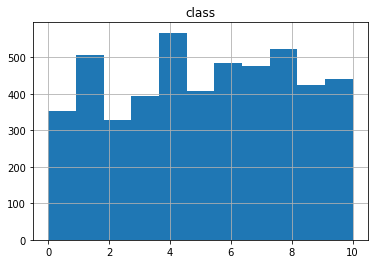

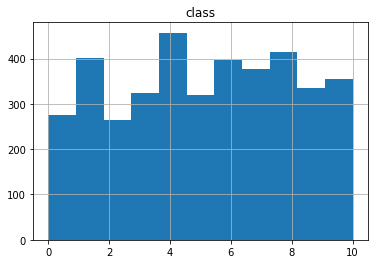

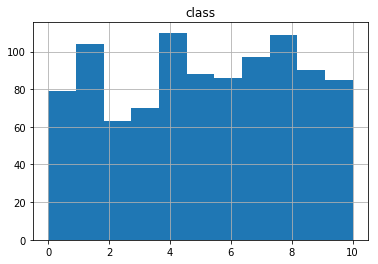

In [34]:
df.hist(bins=11,column="class")
df_train.hist(bins=11,column="class")
df_val.hist(bins=11,column="class")

In [0]:
import numpy as np
num_classes = len(np.unique(df["class"]))

In [36]:
print(df_train.shape)
print(df_val.shape)

(3922, 3)
(981, 3)


## Make the pipeline for loading and resizing the images

In [0]:
# Reads an image from a file, decodes it into a tensor, and resizes it
# to a fixed shape.
img_rows, img_cols = 224,224
batch_size = 32

def _parse_function(filename, label):
  image_string = tf.io.read_file(filename)
  image_decoded = tf.image.decode_jpeg(image_string,channels=3)
  image_resized = tf.image.resize(image_decoded, [img_rows, img_cols])
  image_resized = tf.ensure_shape(image_resized ,shape=(img_rows, img_cols,3))
  if label != None:
    label = tf.one_hot(label, num_classes)
  return image_resized, label

In [0]:
@tf.function
def image_augmentation(image, label):

  # resizing
  if tf.random.uniform(()) > 0.5:
    image = tf.image.resize_with_crop_or_pad( image, img_rows, img_cols)
  else:
    image = tf.image.random_crop( image, size=[ img_rows, img_cols, 3])

  # Image augmentation 
  image = tf.image.random_flip_left_right(image,seed=23)
#   image = tf.image.random_flip_up_down( image, seed=None )

  # Contrast and Brightness
  if tf.random.uniform(()) > 0.4:
    image = tf.image.random_contrast( image, 0.1,0.9,seed=None)
  if tf.random.uniform(()) > 0.4:
    image = tf.image.random_brightness( image, max_delta= 0.05, seed=None)
    image = tf.image.random_hue( image, max_delta= 0.05, seed=None)
  

#   print(image.shape)
  image_resized = image 
#   label = tf.one_hot(label, num_classes)
  
  return image_resized, label


## Assembling the Data pipeline using tf.data

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((tf.cast(df_train['filename'].values, tf.string),
                                                    tf.cast(df_train['class'].values, tf.int32) ))

plain_train_dataset = train_dataset.map(_parse_function)
aug_train_dataset = plain_train_dataset.map(image_augmentation)
# print(plain_train_dataset)
# print(aug_train_dataset)
combined_dataset = plain_train_dataset.concatenate(aug_train_dataset)

train_dataset = combined_dataset.shuffle(5000)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(batch_size, drop_remainder=True)


In [0]:
valid_dataset = tf.data.Dataset.from_tensor_slices((tf.cast(df_val['filename'].values, tf.string),
                                                    tf.cast(df_val['class'].values, tf.int32) ))
valid_dataset = valid_dataset.map(_parse_function)
# valid_dataset = valid_dataset.shuffle(5000)
valid_dataset = valid_dataset.repeat()
valid_dataset = valid_dataset.batch(batch_size, drop_remainder=True)

In [42]:
train_dataset

<BatchDataset shapes: ((32, 224, 224, 3), (32, 11)), types: (tf.float32, tf.float32)>

This will download the VGG network weights 

In [43]:
# create the base pre-trained model
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)
# base_model = tf.keras.applications.NASNetMobile(weights='imagenet', include_top=False)   # 24,227,760 bytes
# base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3),pooling=None)

87916544/87910968 [==============================] - 3s 0us/step


In [0]:
# base_model.summary()

In [0]:
# add a global spatial average pooling layer
x = base_model.output

x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

# x = Dropout(0.3)(x)

# and a logits layer -- let's say we have 2 classes
predictions = Dense(num_classes, activation='softmax')(x)


In [0]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [0]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional VGG16 layers
# for layer in base_model.layers:
#     print(layer.name)
#     layer.trainable = False


#    for nasnet: 
    
# Freeze the InceptionV3 layers except the BatchNorm
for layer in base_model.layers:
#     if 'normal_bn' in layer.name:
    if 'batch' in layer.name:
      layer.trainable = True
    else:
      layer.trainable = False 
      
      


In [48]:
for layer in model.layers:
    print(layer.name,' Trainable =',layer.trainable)

input_1  Trainable = False
conv2d  Trainable = False
batch_normalization  Trainable = True
activation  Trainable = False
conv2d_1  Trainable = False
batch_normalization_1  Trainable = True
activation_1  Trainable = False
conv2d_2  Trainable = False
batch_normalization_2  Trainable = True
activation_2  Trainable = False
max_pooling2d  Trainable = False
conv2d_3  Trainable = False
batch_normalization_3  Trainable = True
activation_3  Trainable = False
conv2d_4  Trainable = False
batch_normalization_4  Trainable = True
activation_4  Trainable = False
max_pooling2d_1  Trainable = False
conv2d_8  Trainable = False
batch_normalization_8  Trainable = True
activation_8  Trainable = False
conv2d_6  Trainable = False
conv2d_9  Trainable = False
batch_normalization_6  Trainable = True
batch_normalization_9  Trainable = True
activation_6  Trainable = False
activation_9  Trainable = False
average_pooling2d  Trainable = False
conv2d_5  Trainable = False
conv2d_7  Trainable = False
conv2d_10  Trainab

In [49]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
opt = tf.keras.optimizers.Adam()

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
import math
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, TensorBoard

# learning rate schedule for dropping every 10 epochs
def LRDropping(epoch_number):
    initial_lrate = 0.001
    drop = 0.9
    epochs_drop = 3.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch_number)/epochs_drop))
    print(lrate)
    return lrate
  
LRDrop = LearningRateScheduler(LRDropping)
K.set_value(model.optimizer.lr,0.001)

In [52]:
train_steps = int(len(df_train)/batch_size) #total trains set / batch_size
val_steps = int(len(df_val)/batch_size)
epochs = 20

print('train steps:',train_steps)
print('val steps:',val_steps)


train steps: 122
val steps: 30


In [53]:
### Train the model with validation 
history = model.fit( train_dataset, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                   callbacks=[LRDrop])

0.001
Epoch 1/20


W0729 13:24:33.536899 139907610998656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/math_grad.py:1366: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 13:25:18.313092 139907610998656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


122/122 [==============================] - 112s 919ms/step - loss: 1.1336 - accuracy: 0.6440 - val_loss: 0.7667 - val_accuracy: 0.7510
0.001
Epoch 2/20
122/122 [==============================] - 33s 270ms/step - loss: 0.5763 - accuracy: 0.8138 - val_loss: 0.4509 - val_accuracy: 0.8573
0.0009000000000000001
Epoch 3/20
122/122 [==============================] - 35s 284ms/step - loss: 0.4039 - accuracy: 0.8653 - val_loss: 0.5559 - val_accuracy: 0.8240
0.0009000000000000001
Epoch 4/20
122/122 [==============================] - 33s 268ms/step - loss: 0.3798 - accuracy: 0.8712 - val_loss: 0.5910 - val_accuracy: 0.8188
0.0009000000000000001
Epoch 5/20
122/122 [==============================] - 34s 282ms/step - loss: 0.3024 - accuracy: 0.9019 - val_loss: 0.5529 - val_accuracy: 0.8365
0.0008100000000000001
Epoch 6/20
122/122 [==============================] - 33s 267ms/step - loss: 0.2988 - accuracy: 0.8986 - val_loss: 0.4684 - val_accuracy: 0.8604
0.0008100000000000001
Epoch 7/20
122/122 [====

In [0]:
# can test saved weights
mydir = "drive/My Drive/reddragonAI/"
# model.load_weights(mydir + 'tf_sports2_inception_weights.h5')


In [55]:
metrics = model.evaluate(valid_dataset,
                   steps = val_steps)
print("model accuracy:",metrics[1])

30/30 [==============================] - 3s 114ms/step - loss: 0.5103 - accuracy: 0.8698
model accuracy: 0.8697917


In [0]:
# model_type="catdog"
model_type="sports3"

In [0]:
model.save_weights('tf_{}_inception_weights.h5'.format(model_type))

In [0]:
model.save_weights(mydir + 'tf_{}_inception_weights.h5'.format(model_type))
model.save(mydir + 'tf_{}_inception_model.h5'.format(model_type))

In [0]:
cat_to_test = "badminton" #@param ["badminton", "baseball", "basketball", "golfing", "gymnastics", "ice_skating", "latin_dance", "pool_billiard", "rockclimbing", "skiing", "yoga"]




In [0]:
image_path = './sports/{}/'.format(cat_to_test)

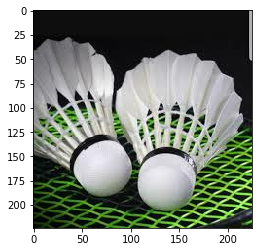

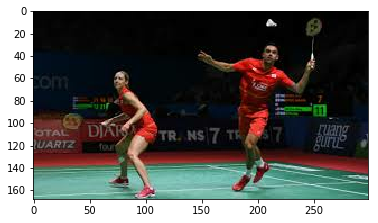

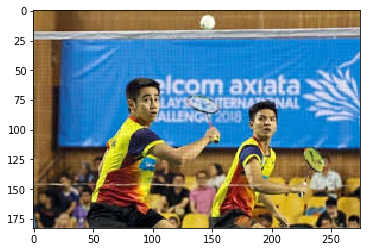

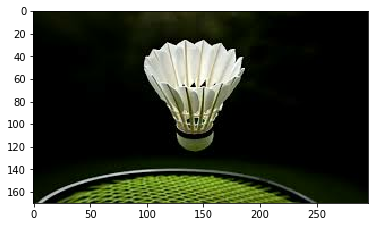

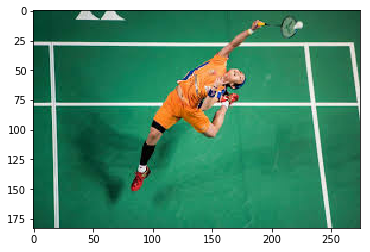

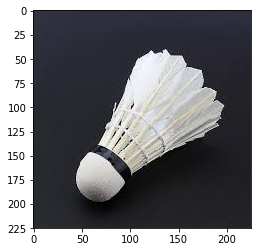

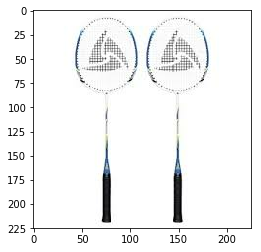

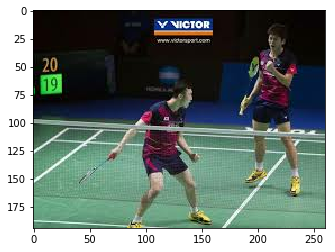

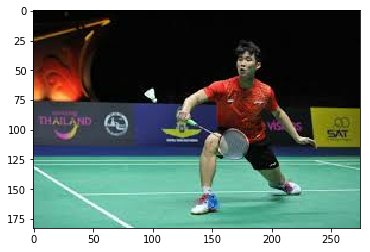

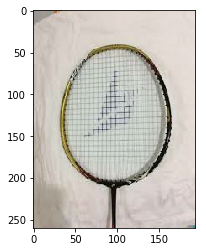

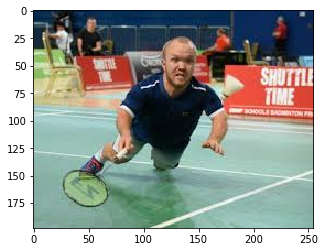

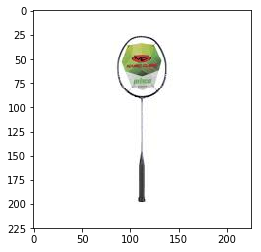

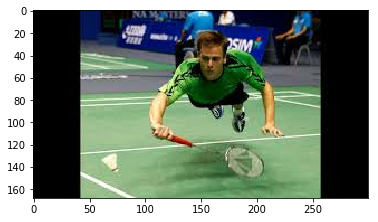

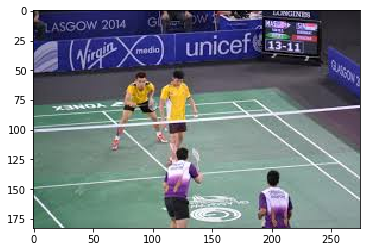

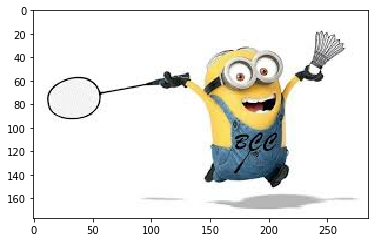

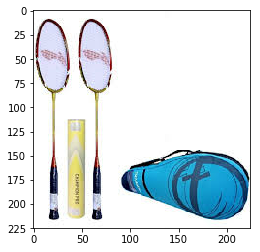

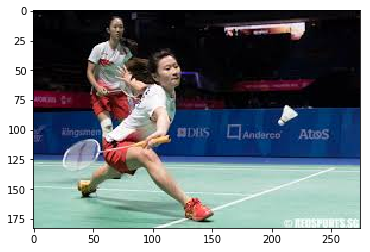

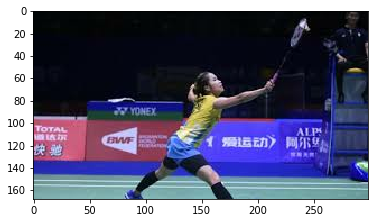

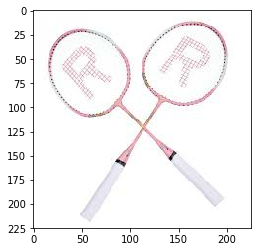

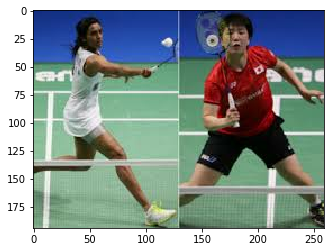

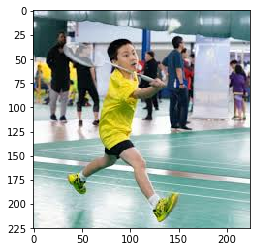

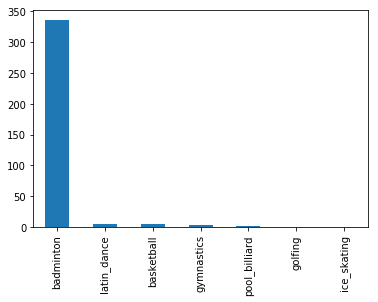

In [143]:
categories = df['class_name'].cat.categories

import matplotlib.pyplot as plt
import random

images_to_check = []
for root, dirs, files in os.walk(image_path, topdown=True):
  for name in files:
    if '.jpg' not in name:
      continue
    filename = os.path.abspath(os.path.join(root, name))
    images_to_check.append(filename)
    
    if (random.random() > 0.95):
      image_string = tf.io.read_file(filename)
      image_decoded = tf.image.decode_jpeg(image_string,channels=3)

      plt.imshow(image_decoded/255)
      plt.show()
    
test_data = pd.DataFrame(columns=["filename"])
test_data = test_data.append([{"filename": i} for i in images_to_check])

  
  
test_dataset = tf.data.Dataset.from_tensor_slices(tf.cast(test_data['filename'].values, tf.string))
test_dataset = test_dataset.map(lambda x: _parse_function(x,None)[0])
test_dataset = test_dataset.batch(32, drop_remainder=True)

preds = model.predict_generator(
  test_dataset,
    steps=int(len(test_data)/32)
)

test_pred = [categories[x] for x in (np.argmax(preds,axis=1))]
pd.Series(test_pred).value_counts().plot(kind='bar')




[22, 28, 63, 84, 87, 161, 190, 223, 234, 275, 294, 298, 303, 310, 313, 317, 338]
predicted: gymnastics


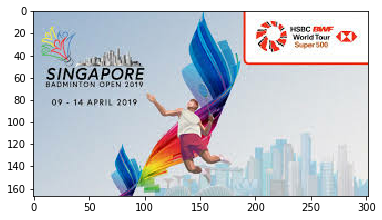

predicted: latin_dance


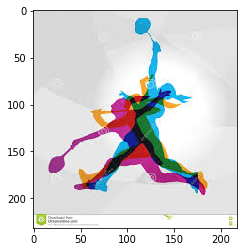

predicted: basketball


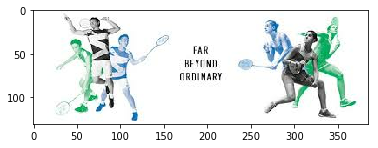

predicted: pool_billiard


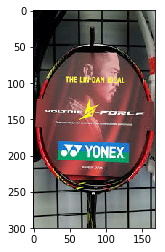

predicted: gymnastics


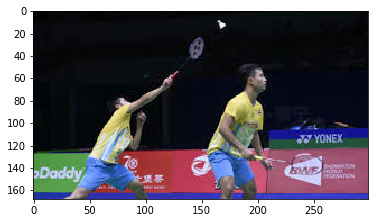

predicted: latin_dance


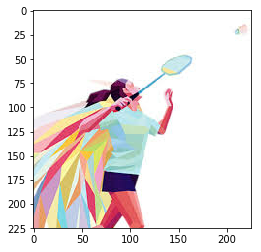

predicted: basketball


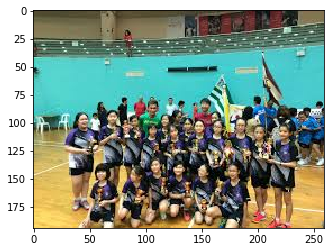

predicted: latin_dance


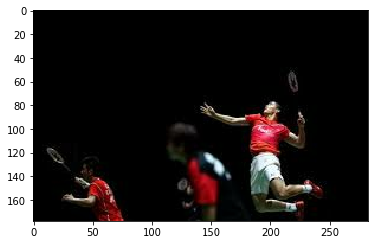

predicted: pool_billiard


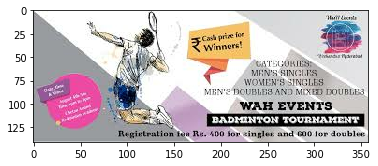

predicted: basketball


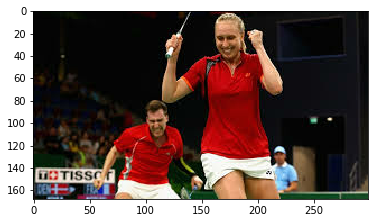

predicted: ice_skating


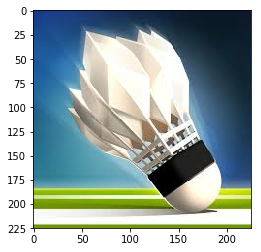

predicted: latin_dance


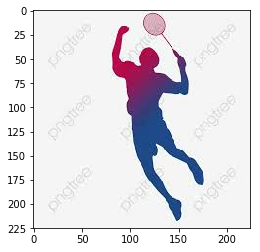

predicted: basketball


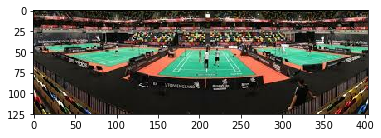

predicted: golfing


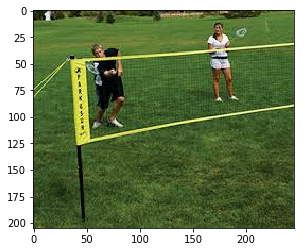

predicted: basketball


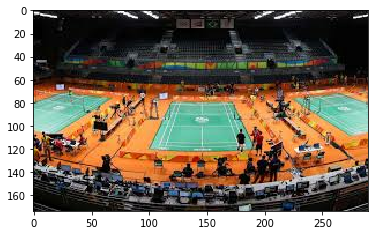

predicted: latin_dance


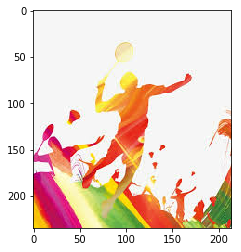

predicted: gymnastics


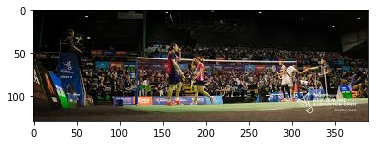

In [144]:
#investigate the wrong ones

test_pred_failed = [i for (i,x) in enumerate(test_pred) if x != cat_to_test]
test_pred_failed_labels = pd.Series(test_pred)[test_pred_failed]

# get pictures from these indices
print(test_pred_failed)
failed_names = test_data.iloc[test_pred_failed,:]
  
for index, row in failed_names.iterrows():
  path = (row["filename"])
  image_string = tf.io.read_file(path)
  image_decoded = tf.image.decode_jpeg(image_string,channels=3)
  print("predicted: " + (test_pred_failed_labels[index]))
  plt.imshow(image_decoded/255)
  plt.show()



In [0]:
def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Normalize the confusion matrix.
  cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure




In [0]:

preds = model.predict_generator(
  valid_dataset,
    steps=val_steps
)
# print(preds)
test_pred = (np.argmax(preds,axis=1))
test_labels = df_val["class"]

In [147]:
print(test_pred)

[ 9 10  4  0  6  3  6 10  3  6  6 10  9  1  5  6  2  8  1  9  6  3  4  9
  6  3  2  8 10  3  1  7  6  5  1  5  4  9  8  8  9  8  5  7  2  6  1  4
 10  0  0  7  0  8  5  7  3 10  0  1  5  7  0  6  7  9  7  3  4  1  4  4
  5  9  9  7  2  0  0  8  5  6  7 10  8  6  5  0  6  4  7  4  0  9  1  8
  5 10  0  4  8  6  2  2  2  5  3  2  8  3  7  6  0  7  8 10  3  4  6  9
  7  1  8  5  9 10  5  0  3  1  6  9  3  8  8  9  7  5  7  5  2  9  1  0
  9  5  1  9  8  6  3  2  8  1 10  6  6  2  8  2  4  6  4  8  9  9  7  5
  8 10  3 10  4  6 10  0  3  2  3  3  5  0 10  7  2  1  5  8  6 10 10  3
  8  1  2  8  3  8  9  6  5  0  4  4  6  7  0  9  1  8  4  0  5  8  1  6
  5  7  0  2  3  6  5  8  4  0  5  8  4  9  0  5  0  9  8 10  0  3  9  6
  5  1  9  4  2  1  7  5  8  9  7  3  4  2  7  6  8  3  8  9  1  8  5  7
 10  7  8 10  7  7  7  2  5  5  7  1  4  9  7  4  2  1  2  1  5  4 10  2
  7  5  4  9  6  0  2  9  2  8  4  7  6 10  7  6  8  2  5  0  1  4  9  9
  8  1  8  5  3  1 10  0  7  2  7  5  9  3  3  7  3

In [0]:
test_labels = test_labels[:test_pred.shape[0]]

In [149]:
print(list(test_pred))
print(list(test_labels))

[9, 10, 4, 0, 6, 3, 6, 10, 3, 6, 6, 10, 9, 1, 5, 6, 2, 8, 1, 9, 6, 3, 4, 9, 6, 3, 2, 8, 10, 3, 1, 7, 6, 5, 1, 5, 4, 9, 8, 8, 9, 8, 5, 7, 2, 6, 1, 4, 10, 0, 0, 7, 0, 8, 5, 7, 3, 10, 0, 1, 5, 7, 0, 6, 7, 9, 7, 3, 4, 1, 4, 4, 5, 9, 9, 7, 2, 0, 0, 8, 5, 6, 7, 10, 8, 6, 5, 0, 6, 4, 7, 4, 0, 9, 1, 8, 5, 10, 0, 4, 8, 6, 2, 2, 2, 5, 3, 2, 8, 3, 7, 6, 0, 7, 8, 10, 3, 4, 6, 9, 7, 1, 8, 5, 9, 10, 5, 0, 3, 1, 6, 9, 3, 8, 8, 9, 7, 5, 7, 5, 2, 9, 1, 0, 9, 5, 1, 9, 8, 6, 3, 2, 8, 1, 10, 6, 6, 2, 8, 2, 4, 6, 4, 8, 9, 9, 7, 5, 8, 10, 3, 10, 4, 6, 10, 0, 3, 2, 3, 3, 5, 0, 10, 7, 2, 1, 5, 8, 6, 10, 10, 3, 8, 1, 2, 8, 3, 8, 9, 6, 5, 0, 4, 4, 6, 7, 0, 9, 1, 8, 4, 0, 5, 8, 1, 6, 5, 7, 0, 2, 3, 6, 5, 8, 4, 0, 5, 8, 4, 9, 0, 5, 0, 9, 8, 10, 0, 3, 9, 6, 5, 1, 9, 4, 2, 1, 7, 5, 8, 9, 7, 3, 4, 2, 7, 6, 8, 3, 8, 9, 1, 8, 5, 7, 10, 7, 8, 10, 7, 7, 7, 2, 5, 5, 7, 1, 4, 9, 7, 4, 2, 1, 2, 1, 5, 4, 10, 2, 7, 5, 4, 9, 6, 0, 2, 9, 2, 8, 4, 7, 6, 10, 7, 6, 8, 2, 5, 0, 1, 4, 9, 9, 8, 1, 8, 5, 3, 1, 10, 0, 7, 2, 7, 5, 9, 3

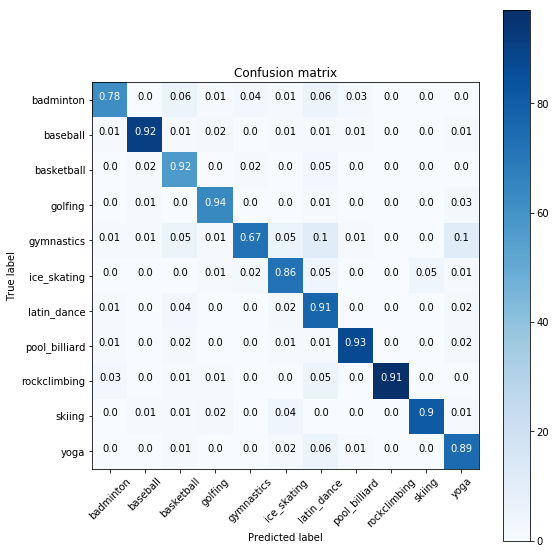

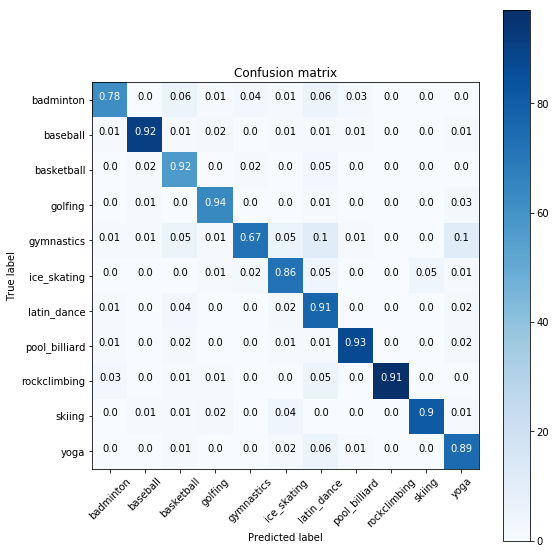

In [150]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
cm = confusion_matrix(test_labels, test_pred)
plot_confusion_matrix(cm, categories)

In [0]:

img_path = "/content/sports/{}/images (64).jpg".format(cat_to_test)
sample = _parse_function(img_path,None)[0]

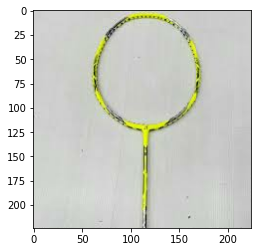

In [152]:
plt.imshow(sample/255)
plt.show()

In [153]:

samplebatch = tf.expand_dims(sample, 0)
print(samplebatch.shape)

(1, 224, 224, 3)


In [154]:
preds = model.predict(samplebatch)
print('Predicted:', preds)

i = np.argmax(preds)
# print(i)
categories = df['class_name'].cat.categories
print('Predicted:', categories[i])

Predicted: [[9.9961579e-01 5.0815117e-05 1.0472765e-04 5.1705174e-06 2.3616061e-05
  2.0634019e-05 1.8670497e-05 3.0053588e-06 5.2536925e-05 7.0535375e-06
  9.8025143e-05]]
Predicted: badminton
